In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import pickle
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,HashingVectorizer
from sklearn import *
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn import metrics


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Working with Dataset-1

In [2]:
df_1_fake = pd.read_csv("Dataset-1/Fake.csv")
df_1_true = pd.read_csv("Dataset-1/True.csv")

In [3]:
df_1_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_1_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Real News = 0 and Fake News = 1 

In [5]:
df_1_fake["label"] = 1
df_1_true["label"] = 0

In [6]:
Dataset_1= pd.concat([df_1_fake, df_1_true], axis =0 )
Dataset_1

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [7]:
Dataset_1.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [8]:
Dataset_1 = Dataset_1.drop(["title", "subject","date"], axis = 1)

In [9]:
Dataset_1

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",0
21414,MINSK (Reuters) - In the shadow of disused Sov...,0
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,0


In [10]:
Dataset_1.isnull().sum()

text     0
label    0
dtype: int64

## Working with Dataset-2

In [11]:
Dataset_2 = pd.read_csv("Dataset-2/train.csv")

In [12]:
Dataset_2

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [13]:
Dataset_2.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [14]:
Dataset_2

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [15]:
Dataset_2 = Dataset_2.drop(["id", "title","author"], axis = 1)

In [16]:
Dataset_2

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [17]:
Dataset_2.isnull().sum()

text     39
label     0
dtype: int64

In [18]:
Dataset_2=Dataset_2.dropna()

In [19]:
Dataset_2.isnull().sum()

text     0
label    0
dtype: int64

In [20]:
Dataset_2

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [21]:
Dataset_2.isnull().sum()

text     0
label    0
dtype: int64

## Working with Dataset-3

In [22]:
Dataset_3 = pd.read_csv("Dataset-3/fake_or_real_news.csv")

In [23]:
Dataset_3

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [24]:
Dataset_3.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [25]:
def classes_def(x):
    if x ==  "REAL":
        return 0
   
    else:
        return 1

In [26]:
Dataset_3['label']=Dataset_3['label'].apply(lambda x:classes_def(x))

In [27]:
Dataset_3

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0


In [28]:
Dataset_3 = Dataset_3.drop(["Unnamed: 0", "title"], axis = 1)

In [29]:
Dataset_3

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,U.S. Secretary of State John F. Kerry said Mon...,0
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,It's primary day in New York and front-runners...,0
...,...,...
6330,The State Department told the Republican Natio...,0
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,Anti-Trump Protesters Are Tools of the Oligar...,1
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",0


In [30]:
Dataset_3.isnull().sum()

text     0
label    0
dtype: int64

## Creating custom dataset

In [31]:
marged_df= pd.concat([Dataset_1,Dataset_2, Dataset_3], axis =0 )

In [32]:
marged_df

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
...,...,...
6330,The State Department told the Republican Natio...,0
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,Anti-Trump Protesters Are Tools of the Oligar...,1
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",0


In [33]:
marged_df.isnull().sum()

text     0
label    0
dtype: int64

In [34]:
marged_df.duplicated(keep='first').sum()

9376

In [35]:
marged_df.drop_duplicates(keep='first',inplace=True)

In [36]:
marged_df.duplicated(keep='first').sum()

0

In [37]:
marged_df = marged_df.sample(frac = 1)

In [38]:
marged_df

,text,label
5726,The latest free content update for Titanfall 2...,0
12521,WASHINGTON (Reuters) - The U.S. State Departme...,0
3493,For the past week since Trump struck one of hi...,1
16292,"MIDDELBURG, South Africa (Reuters) - Two white...",0
21136,"Proving what we already knew, loyalty to radic...",1
...,...,...
6490,The list of establishment Republicans who are ...,1
20738,TUNIS (Reuters) - Tunisia s two main parties o...,0
19677,Dolce Gabbana has released “#BoycottDolceGabb...,0
1750,Monday on his nationally syndicated radio prog...,0


## Removing last 50 rows for manual testing

In [39]:
marged_df.reset_index(inplace=True)

In [40]:
marged_df

,index,text,label
0,5726,The latest free content update for Titanfall 2...,0
1,12521,WASHINGTON (Reuters) - The U.S. State Departme...,0
2,3493,For the past week since Trump struck one of hi...,1
3,16292,"MIDDELBURG, South Africa (Reuters) - Two white...",0
4,21136,"Proving what we already knew, loyalty to radic...",1
...,...,...,...
62613,6490,The list of establishment Republicans who are ...,1
62614,20738,TUNIS (Reuters) - Tunisia s two main parties o...,0
62615,19677,Dolce Gabbana has released “#BoycottDolceGabb...,0
62616,1750,Monday on his nationally syndicated radio prog...,0


In [41]:
marged_df.columns

Index(['index', 'text', 'label'], dtype='object')

In [42]:
marged_df = marged_df.drop(["index"], axis = 1)

In [43]:
df_manual_testing = marged_df.tail(50)
for i in range(62617,62567,-1):
    marged_df.drop([i], axis = 0, inplace = True)

In [44]:
marged_df

,text,label
0,The latest free content update for Titanfall 2...,0
1,WASHINGTON (Reuters) - The U.S. State Departme...,0
2,For the past week since Trump struck one of hi...,1
3,"MIDDELBURG, South Africa (Reuters) - Two white...",0
4,"Proving what we already knew, loyalty to radic...",1
...,...,...
62563,"ESCADA, Brazil — Not a soul was in sight on...",0
62564,"This speech, delivered by President Ronald Rea...",1
62565,If Donald Trump thought he d be seeing Elton J...,1
62566,"Before most of us were awake, Trump was busily...",1


In [45]:
df_manual_testing.to_csv("manual_testing.csv")

## Creating Working dataset

In [46]:
marged_df

,text,label
0,The latest free content update for Titanfall 2...,0
1,WASHINGTON (Reuters) - The U.S. State Departme...,0
2,For the past week since Trump struck one of hi...,1
3,"MIDDELBURG, South Africa (Reuters) - Two white...",0
4,"Proving what we already knew, loyalty to radic...",1
...,...,...
62563,"ESCADA, Brazil — Not a soul was in sight on...",0
62564,"This speech, delivered by President Ronald Rea...",1
62565,If Donald Trump thought he d be seeing Elton J...,1
62566,"Before most of us were awake, Trump was busily...",1


In [47]:
marged_df.to_csv("WorkingData.csv")

## Start working with custom data

In [48]:
working_data = pd.read_csv("WorkingData.csv")

In [49]:
working_data

,Unnamed: 0,text,label
0,0,The latest free content update for Titanfall 2...,0
1,1,WASHINGTON (Reuters) - The U.S. State Departme...,0
2,2,For the past week since Trump struck one of hi...,1
3,3,"MIDDELBURG, South Africa (Reuters) - Two white...",0
4,4,"Proving what we already knew, loyalty to radic...",1
...,...,...,...
62563,62563,"ESCADA, Brazil — Not a soul was in sight on...",0
62564,62564,"This speech, delivered by President Ronald Rea...",1
62565,62565,If Donald Trump thought he d be seeing Elton J...,1
62566,62566,"Before most of us were awake, Trump was busily...",1


In [50]:
working_data.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

In [51]:
working_data = working_data.drop(["Unnamed: 0"], axis = 1)

In [52]:
working_data

,text,label
0,The latest free content update for Titanfall 2...,0
1,WASHINGTON (Reuters) - The U.S. State Departme...,0
2,For the past week since Trump struck one of hi...,1
3,"MIDDELBURG, South Africa (Reuters) - Two white...",0
4,"Proving what we already knew, loyalty to radic...",1
...,...,...
62563,"ESCADA, Brazil — Not a soul was in sight on...",0
62564,"This speech, delivered by President Ronald Rea...",1
62565,If Donald Trump thought he d be seeing Elton J...,1
62566,"Before most of us were awake, Trump was busily...",1


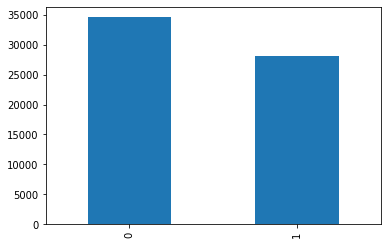

In [53]:
ax = working_data.label.value_counts().plot(kind='bar')
fig = ax.get_figure()

In [54]:

Fake = working_data['label'][working_data.label == 1 ]
Real = working_data['label'][working_data.label == 0 ]


print('Total length of the data is:   {}'.format(working_data.shape[0]))
print('No. of Real news is:  {}'.format(len(Real)))
print('No. of Fake news is: {}'.format(len(Fake)))


Total length of the data is:   62568
No. of Real news is:  34538
No. of Fake news is: 28030


In [55]:
working_data.duplicated(keep='first').sum()

0

In [56]:
working_data.isnull().sum()

text     0
label    0
dtype: int64

## Chosing 56,000 data randomly to work with

In [57]:
df_0 = working_data[working_data.label== 0]

In [58]:
df_1 = working_data[working_data.label== 1]

In [59]:
df_0

,text,label
0,The latest free content update for Titanfall 2...,0
1,WASHINGTON (Reuters) - The U.S. State Departme...,0
3,"MIDDELBURG, South Africa (Reuters) - Two white...",0
7,Police responded to an incident in central Lon...,0
8,MEXICO CITY (Reuters) - The United Nations sai...,0
...,...,...
62558,MOSCOW (Reuters) - Russia’s next ambassador to...,0
62559,As the Islamic State seeks to export its brand...,0
62561,This is a story about the swing voter. The vot...,0
62562,The United Nations Office of the High Commissi...,0


In [60]:
df_1

,text,label
2,For the past week since Trump struck one of hi...,1
4,"Proving what we already knew, loyalty to radic...",1
5,"According to The New York Times, the vice chai...",1
6,Email Donald Trump warned in an interview Tues...,1
9,West Virginia Governor Jim Justice gave Trump ...,1
...,...,...
62560,"Donald Trump s scandal-ridden, chaotic White H...",1
62564,"This speech, delivered by President Ronald Rea...",1
62565,If Donald Trump thought he d be seeing Elton J...,1
62566,"Before most of us were awake, Trump was busily...",1


In [61]:
df_0 = df_0.sample(n=28000)

In [62]:
df_1 = df_1.sample(n=28000)

In [63]:
df= pd.concat([df_0, df_1], axis =0 )

In [64]:
df

,text,label
58334,PRAGUE (Reuters) - The European Union s chief ...,0
3721,WASHINGTON (Reuters) - New U.S. President Dona...,0
35793,(Reuters) - U.S. Secretary of State Rex Tiller...,0
17474,LIMA (Reuters) - Peruvian President Pedro Pabl...,0
11586,.@SenatorCollins says Senate ”starting from sc...,0
...,...,...
25283,Crisis Pregnancy Centers are fake medical offi...,1
34373,(actualizada a las 20:39 26.10.2016) URL corto...,1
49083,News & views NOT related to the U.S. election ...,1
50307,Former U.S. Attorney Joseph diGenova slammed F...,1


In [65]:
df = df.sample(frac = 1)

In [66]:
df.reset_index(inplace=True)

In [67]:
df.columns

Index(['index', 'text', 'label'], dtype='object')

In [68]:
df = df.drop(["index"], axis = 1)

In [69]:
df

,text,label
0,Washington (CNN) President Barack Obama on Thu...,0
1,It is DISTURBING to think that they have known...,1
2,"Sorry Bernie, but it s all about Obama s third...",1
3,8 Ways To Forge Strength Through Challenges ...,1
4,"ASPEN, Colorado (Reuters) - The Trump administ...",0
...,...,...
55995,WASHINGTON (Reuters) - U.S. President Donald T...,0
55996,Presumptive Republican presidential nominee Do...,0
55997,WIKILEAKS JUST DROPPED DOCUMENTS EXPOSING THE ...,1
55998,Fox Host Bret Baier found himself forced to re...,1


## Making pickle file the randomly chosen 40,000 data 

In [70]:
with open ('df.pickle','wb') as f:
    pickle.dump(df,f)

In [71]:
with open ('df.pickle','rb') as f:
    df=pickle.load(f)

In [72]:
df

,text,label
0,Washington (CNN) President Barack Obama on Thu...,0
1,It is DISTURBING to think that they have known...,1
2,"Sorry Bernie, but it s all about Obama s third...",1
3,8 Ways To Forge Strength Through Challenges ...,1
4,"ASPEN, Colorado (Reuters) - The Trump administ...",0
...,...,...
55995,WASHINGTON (Reuters) - U.S. President Donald T...,0
55996,Presumptive Republican presidential nominee Do...,0
55997,WIKILEAKS JUST DROPPED DOCUMENTS EXPOSING THE ...,1
55998,Fox Host Bret Baier found himself forced to re...,1


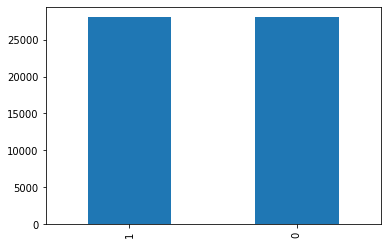

In [73]:
ax = df.label.value_counts().plot(kind='bar')
fig = ax.get_figure()

In [74]:
Fake = df['label'][df.label == 1 ]
Real = df['label'][df.label == 0 ]


print('Total length of the data is:   {}'.format(df.shape[0]))
print('No. of Real news is:  {}'.format(len(Real)))
print('No. of Fake news is: {}'.format(len(Fake)))


Total length of the data is:   56000
No. of Real news is:  28000
No. of Fake news is: 28000


In [75]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [76]:
df.duplicated(keep='first').sum()

0

## Cleaning Data

In [77]:
def before_lowercase_1(text):
    tweet = re.sub(r" usa ", " America ", text)
    tweet = re.sub(r" USA ", " America ", text)
    tweet = re.sub(r" us ", " America ", text)
    tweet = re.sub(r" uk ", " England ", text)
    tweet = re.sub(r" UK ", " England ", text)
    tweet = re.sub(r"the US", "America", text)
    tweet = re.sub(r"Coronavirus", " covid ", text)
    tweet = re.sub(r"Covid19", " covid ", text)
    return str(tweet)

In [78]:
df['text'] = df['text'].apply(before_lowercase_1)
display(df['text'].head(10))

0    Washington (CNN) President Barack Obama on Thu...
1    It is DISTURBING to think that they have known...
2    Sorry Bernie, but it s all about Obama s third...
3      8 Ways To Forge Strength Through Challenges ...
4    ASPEN, Colorado (Reuters) - The Trump administ...
5    KABUL (Reuters) - A suicide bomber in an explo...
6    The gazebo at the Cudell Recreation Center in ...
7      \nOK you Russians! No more gentle American d...
8     21st Century Wire says During yesterday s cab...
9    HARARE (Reuters) - Four tanks were seen headin...
Name: text, dtype: object

In [79]:
def clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [80]:
df['text'] = df['text'].apply(clean)
display(df['text'].head(10))

0    washington  cnn  president barack obama on thu...
1    it is disturbing to think that they have known...
2    sorry bernie  but it s all about obama s third...
3       ways to forge strength through challenges  ...
4    aspen  colorado  reuters    the trump administ...
5    kabul  reuters    a suicide bomber in an explo...
6    the gazebo at the cudell recreation center in ...
7       ok you russians  no more gentle american di...
8      century wire says during yesterday s cabinet...
9    harare  reuters    four tanks were seen headin...
Name: text, dtype: object

## Tokenizer

In [81]:
df['text'] = df['text'].apply(word_tokenize)
display(df['text'].head(5))

0    [washington, cnn, president, barack, obama, on...
1    [it, is, disturbing, to, think, that, they, ha...
2    [sorry, bernie, but, it, s, all, about, obama,...
3    [ways, to, forge, strength, through, challenge...
4    [aspen, colorado, reuters, the, trump, adminis...
Name: text, dtype: object

## Lemmatizer

In [82]:
lem = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lem.lemmatize(w) for w in input]

In [83]:
df['text'] = df['text'].apply(lemma_wordnet)

In [84]:
display(df['text'].head(5))

0    [washington, cnn, president, barack, obama, on...
1    [it, is, disturbing, to, think, that, they, ha...
2    [sorry, bernie, but, it, s, all, about, obama,...
3    [way, to, forge, strength, through, challenge,...
4    [aspen, colorado, reuters, the, trump, adminis...
Name: text, dtype: object

In [85]:
def combine_text(input):
    combined = ' '.join(input)
    return combined

In [86]:
df['text'] = df['text'].apply(combine_text)
df['text']

0        washington cnn president barack obama on thurs...
1        it is disturbing to think that they have known...
2        sorry bernie but it s all about obama s third ...
3        way to forge strength through challenge way to...
4        aspen colorado reuters the trump administratio...
                               ...                        
55995    washington reuters u s president donald trump ...
55996    presumptive republican presidential nominee do...
55997    wikileaks just dropped document exposing the c...
55998    fox host bret baier found himself forced to re...
55999    cairo amman beirut reuters arab denounced pres...
Name: text, Length: 56000, dtype: object

In [87]:
df

,text,label
0,washington cnn president barack obama on thurs...,0
1,it is disturbing to think that they have known...,1
2,sorry bernie but it s all about obama s third ...,1
3,way to forge strength through challenge way to...,1
4,aspen colorado reuters the trump administratio...,0
...,...,...
55995,washington reuters u s president donald trump ...,0
55996,presumptive republican presidential nominee do...,0
55997,wikileaks just dropped document exposing the c...,1
55998,fox host bret baier found himself forced to re...,1


## Train Test Split

In [88]:
train, test = train_test_split(df)

In [89]:
train

,text,label
18293,copenhagen reuters denmark s prince henrik the...,0
54700,thu oct utc sergey kazak sputnik russian strat...,1
18196,insulin s inventor sold the patent for then dr...,1
20745,washington reuters the senate intelligence com...,0
6483,ankara reuters the planned independence refere...,0
...,...,...
51062,keywords alzhemier s disease anxiety dementia ...,1
10690,richmond va here in the onetime capital of the...,0
52262,cairo reuters president abdel fattah al sisi s...,0
4632,is not the largest street gang in the united s...,0


In [90]:
test

,text,label
35246,washington reuters u s president donald trump ...,0
13818,sacramento calif new york reuters u s presiden...,0
39232,seoul washington reuters north korea displayed...,0
40480,kashmiri observes black day decade after india...,1
36559,the clinton email scandal ha taken an unexpect...,1
...,...,...
48156,saturday night live hilariously skewered donal...,1
16489,the nyp reported that the player whom bob mcna...,1
41032,this is what being pathetic look like house sp...,1
39494,it s not tough to imagine that nascar race hav...,1


## TI-IDF

In [91]:
vectorizer_tfidf= TfidfVectorizer(max_features=3000,stop_words=stopwords.words('english'))

In [92]:
X_train_tfidf = vectorizer_tfidf.fit_transform(train['text'])
Y_train_tfidf = train['label'] 
X_test_tfidf = vectorizer_tfidf.transform(test['text'])
Y_test_tfidf = test['label']

In [93]:
with open('X_train_tfidf.pickle','wb') as f:
    pickle.dump(X_train_tfidf,f)

In [94]:
with open('Y_train_tfidf.pickle','wb') as f:
    pickle.dump(Y_train_tfidf,f)

In [95]:
with open('X_test_tfidf.pickle','wb') as f:
    pickle.dump(X_test_tfidf,f)

In [96]:
with open('Y_test_tfidf.pickle','wb') as f:
    pickle.dump(Y_test_tfidf,f)

## Bag of Words

In [97]:
vectorizer_bw = CountVectorizer(max_features=3000,stop_words=stopwords.words('english'))

In [98]:
X_train_bw = vectorizer_bw.fit_transform(train['text'])
Y_train_bw = train['label'] 
X_test_bw = vectorizer_bw.transform(test['text'])
Y_test_bw = test['label']

In [99]:
with open('X_train_bw.pickle','wb') as f:
    pickle.dump(X_train_bw,f)

In [100]:
with open('Y_train_bw.pickle','wb') as f:
    pickle.dump(Y_train_bw,f)

In [101]:
with open('X_test_bw.pickle','wb') as f:
    pickle.dump(X_test_bw,f)

In [102]:
with open('Y_test_bw.pickle','wb') as f:
    pickle.dump(Y_test_bw,f)

##  Logistic Regression with TI-IDF

In [103]:
with open('X_train_tfidf.pickle','rb') as f:
    X_train_tfidf=pickle.load(f)

In [104]:
with open('Y_train_tfidf.pickle','rb') as f:
    Y_train_tfidf=pickle.load(f)

In [105]:
with open('X_test_tfidf.pickle','rb') as f:
    X_test_tfidf=pickle.load(f)

In [106]:
with open('Y_test_tfidf.pickle','rb') as f:
    Y_test_tfidf=pickle.load(f)

In [107]:
LR_classifer=LogisticRegression( multi_class='ovr', random_state=0,solver='saga',C=1,penalty='l1')
LR_classifer.fit(X_train_tfidf,Y_train_tfidf)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=0,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [108]:
with open ('LG_tfidf.pickle','wb') as f:
    pickle.dump(LR_classifer,f)

In [109]:
with open ('LG_tfidf.pickle','rb') as f:
    LG_tfidf=pickle.load(f)

In [110]:
train_accuracy = LG_tfidf.score(X_train_tfidf, Y_train_tfidf)
test_accuracy = LG_tfidf.score(X_test_tfidf, Y_test_tfidf)

print('Logistic Regression with TF-IDF', '-'*40, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Logistic Regression with TF-IDF
----------------------------------------
Accuracy on Train Data : 0.95
Accuracy on Test Data  : 0.94


In [111]:
test_predict_LG_tfidf=LG_tfidf.predict(X_test_tfidf)

In [112]:
cm_LG_tfidf=confusion_matrix(Y_test_tfidf,test_predict_LG_tfidf)
cm_LG_tfidf

array([[6659,  420],
       [ 356, 6565]], dtype=int64)

Text(0.5, 1, 'Logistic Regration with TF-IDF \n')

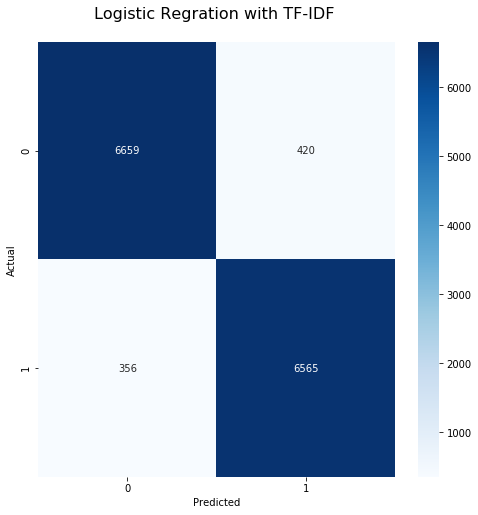

In [113]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_LG_tfidf, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Logistic Regration with TF-IDF \n", size=16)

In [114]:
print(classification_report(Y_test_tfidf,test_predict_LG_tfidf))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7079
           1       0.94      0.95      0.94      6921

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



## Logistic Regression with Bag of words

In [115]:
with open('X_train_bw.pickle','rb') as f:
    X_train_bw=pickle.load(f)

In [116]:
with open('Y_train_bw.pickle','rb') as f:
    Y_train_bw=pickle.load(f)

In [117]:
with open('X_test_bw.pickle','rb') as f:
    X_test_bw=pickle.load(f)

In [118]:
with open('Y_test_bw.pickle','rb') as f:
    Y_test_bw=pickle.load(f)

In [119]:
LR_bw=LogisticRegression( multi_class='ovr', random_state=0,solver='saga',C=1,penalty='l1')
LR_bw.fit(X_train_bw,Y_train_bw)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=0,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [120]:
with open ('LG_bw.pickle','wb') as f:
    pickle.dump(LR_bw,f)

In [121]:
with open ('LG_bw.pickle','rb') as f:
    LG_bw=pickle.load(f)

In [122]:
train_accuracy = LG_bw.score(X_train_bw, Y_train_bw)
test_accuracy = LG_bw.score(X_test_bw, Y_test_bw)

print('Logistic Regression with TF-DIF', '-'*40, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Logistic Regression with TF-DIF
----------------------------------------
Accuracy on Train Data : 0.93
Accuracy on Test Data  : 0.92


In [123]:
test_predict_LG_bw=LG_bw.predict(X_test_bw)

In [124]:
cm_LG_bw=confusion_matrix(Y_test_bw,test_predict_LG_bw)
cm_LG_bw

array([[6610,  469],
       [ 648, 6273]], dtype=int64)

Text(0.5, 1, 'Logistic Regration with Bag of Words \n')

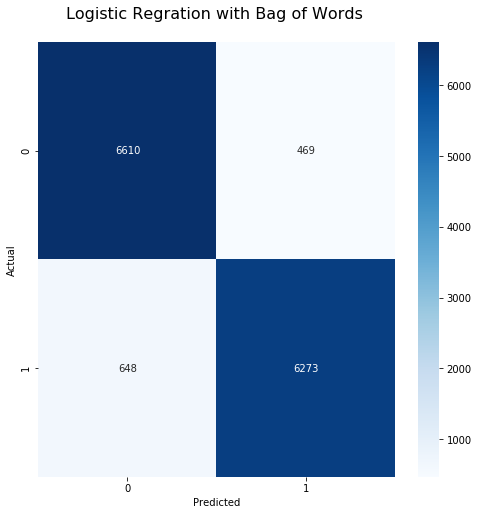

In [125]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_LG_bw, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Logistic Regration with Bag of Words \n", size=16)

In [126]:
print(classification_report(Y_test_bw,test_predict_LG_bw))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7079
           1       0.93      0.91      0.92      6921

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



## Decision Tree Classification with TI-IDF

In [127]:
DT_tfidf = DecisionTreeClassifier(criterion='entropy',max_depth = 10,splitter='best',random_state=42,min_samples_split=4)

In [128]:
DT_tfidf.fit(X_train_tfidf,Y_train_tfidf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [129]:
with open ('DT_tfidf.pickle','wb') as f:
    pickle.dump(DT_tfidf,f)

In [130]:
with open ('DT_tfidf.pickle','rb') as f:
    DT_tfidf=pickle.load(f)

In [131]:
train_accuracy = DT_tfidf.score(X_train_tfidf, Y_train_tfidf)
test_accuracy = DT_tfidf.score(X_test_tfidf, Y_test_tfidf)

print('Decision Tree with TF-IDF', '-'*40, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Decision Tree with TF-IDF
----------------------------------------
Accuracy on Train Data : 0.92
Accuracy on Test Data  : 0.90


In [132]:
test_predict_DT_tfidf=DT_tfidf.predict(X_test_tfidf)

In [133]:
cm_DT_tfidf=confusion_matrix(Y_test_tfidf,test_predict_DT_tfidf)
cm_DT_tfidf

array([[6067, 1012],
       [ 403, 6518]], dtype=int64)

Text(0.5, 1, 'Decision Tree with TF-IDF \n')

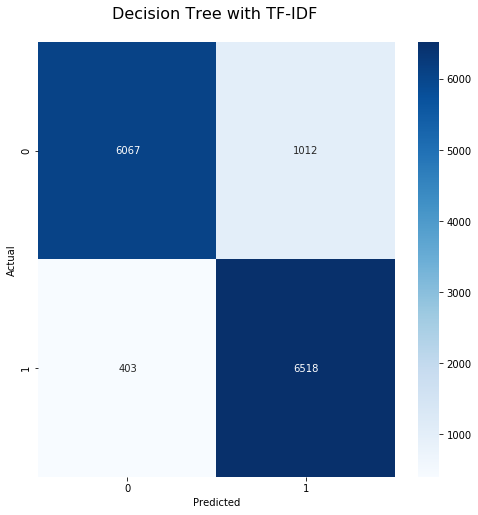

In [134]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_DT_tfidf, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Decision Tree with TF-IDF \n", size=16)

In [135]:
print(classification_report(Y_test_tfidf,test_predict_DT_tfidf))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7079
           1       0.87      0.94      0.90      6921

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



## Decision Tree Classification with Bag of words

In [136]:
DT_bw = DecisionTreeClassifier(criterion='entropy',max_depth = 10,splitter='best',random_state=42,min_samples_split=4)

In [137]:
DT_bw.fit(X_train_bw,Y_train_bw)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [138]:
with open ('DT_bw.pickle','wb') as f:
    pickle.dump(DT_bw,f)

In [139]:
with open ('DT_bw.pickle','rb') as f:
    DT_bw=pickle.load(f)

In [140]:
train_accuracy = DT_bw.score(X_train_bw, Y_train_bw)
test_accuracy = DT_bw.score(X_test_bw, Y_test_bw)

print('Decision Tree with Bag of words', '-'*40, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Decision Tree with Bag of words
----------------------------------------
Accuracy on Train Data : 0.93
Accuracy on Test Data  : 0.91


In [141]:
test_predict_DT_bw=DT_bw.predict(X_test_bw)

In [142]:
cm_DT_bw=confusion_matrix(Y_test_bw,test_predict_DT_bw)
cm_DT_bw

array([[6152,  927],
       [ 351, 6570]], dtype=int64)

Text(0.5, 1, 'Decision Tree with Bag of words\n')

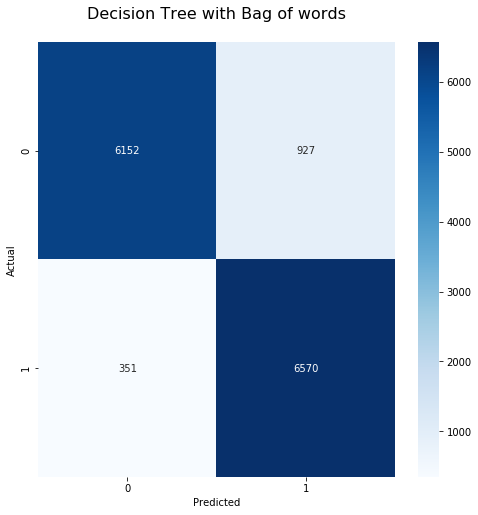

In [143]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_DT_bw, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Decision Tree with Bag of words\n", size=16)

In [144]:
print(classification_report(Y_test_bw,test_predict_DT_bw))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7079
           1       0.88      0.95      0.91      6921

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



## Random Forest Classifier with TF-IDF

In [145]:
RFC_tfidf = RandomForestClassifier(random_state=1,max_depth = 12,min_samples_split = 2,n_estimators = 500,min_samples_leaf = 1)

In [146]:
RFC_tfidf.fit(X_train_tfidf,Y_train_tfidf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [147]:
with open ('RFC_tfidf.pickle','wb') as f:
    pickle.dump(RFC_tfidf,f)

In [148]:
with open ('RFC_tfidf.pickle','rb') as f:
    RFC_tfidf=pickle.load(f)

In [149]:
train_accuracy = RFC_tfidf.score(X_train_tfidf, Y_train_tfidf)
test_accuracy = RFC_tfidf.score(X_test_tfidf, Y_test_tfidf)

print('Random Forest with TF-IDF', '-'*40, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Random Forest with TF-IDF
----------------------------------------
Accuracy on Train Data : 0.94
Accuracy on Test Data  : 0.90


In [150]:
test_predict_RFC_tfidf=RFC_tfidf.predict(X_test_tfidf)

In [151]:
cm_RFC_tfidf=confusion_matrix(Y_test_tfidf,test_predict_RFC_tfidf)
cm_RFC_tfidf

array([[6281,  798],
       [ 551, 6370]], dtype=int64)

Text(0.5, 1, 'Random Forest with TF-IDF \n')

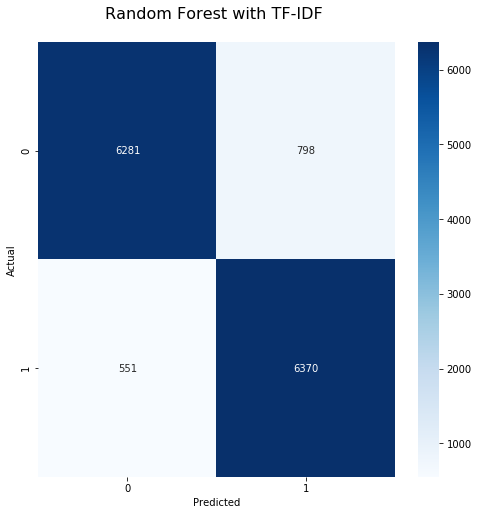

In [152]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_RFC_tfidf, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Random Forest with TF-IDF \n", size=16)

In [153]:
print(classification_report(Y_test_tfidf,test_predict_RFC_tfidf))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      7079
           1       0.89      0.92      0.90      6921

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000



## Random Forest Classifier with Bag of Words

In [154]:
RFC_bw = RandomForestClassifier(random_state=1,max_depth = 12,min_samples_split = 2,n_estimators = 500,min_samples_leaf = 1)

In [155]:
RFC_bw.fit(X_train_bw,Y_train_bw)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [156]:
with open ('RFC_bw.pickle','wb') as f:
    pickle.dump(RFC_bw,f)

In [159]:
with open ('RFC_bw.pickle','rb') as f:
    RFC_bw=pickle.load(f)

In [160]:
train_accuracy = RFC_bw.score(X_train_bw, Y_train_bw)
test_accuracy = RFC_bw.score(X_test_bw, Y_test_bw)

print('Random Forest with Bag of words', '-'*40, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Random Forest with Bag of words
----------------------------------------
Accuracy on Train Data : 0.93
Accuracy on Test Data  : 0.91


In [161]:
test_predict_RFC_bw=RFC_bw.predict(X_test_bw)

In [162]:
cm_RFC_bw=confusion_matrix(Y_test_bw,test_predict_RFC_bw)
cm_RFC_bw

array([[6310,  769],
       [ 529, 6392]], dtype=int64)

Text(0.5, 1, 'Decision Tree with Bag of words\n')

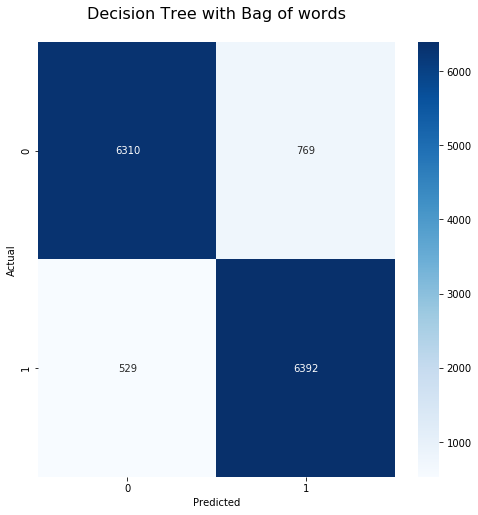

In [163]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_RFC_bw, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Decision Tree with Bag of words\n", size=16)

In [164]:
print(classification_report(Y_test_bw,test_predict_RFC_bw))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      7079
           1       0.89      0.92      0.91      6921

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



## Naive Bayes with TF-IDF

In [165]:
NB_tfidf=MultinomialNB(alpha=0.9)

In [166]:
NB_tfidf.fit(X_train_tfidf,Y_train_tfidf)

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

In [167]:
with open ('NB_tfidf.pickle','wb') as f:
    pickle.dump(NB_tfidf,f)

In [168]:
with open ('NB_tfidf.pickle','rb') as f:
    NB_tfidf=pickle.load(f)

In [169]:
train_accuracy = NB_tfidf.score(X_train_tfidf, Y_train_tfidf)
test_accuracy = NB_tfidf.score(X_test_tfidf, Y_test_tfidf)

print('Naive Bayes with TF-DIF', '-'*40, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Naive Bayes with TF-DIF
----------------------------------------
Accuracy on Train Data : 0.85
Accuracy on Test Data  : 0.84


In [170]:
test_predict_NB_tfidf=NB_tfidf.predict(X_test_tfidf)

In [171]:
cm_NB_tfidf=confusion_matrix(Y_test_tfidf,test_predict_NB_tfidf)
cm_NB_tfidf

array([[5812, 1267],
       [ 981, 5940]], dtype=int64)

Text(0.5, 1, 'Naive Bayes with TF-IDF \n')

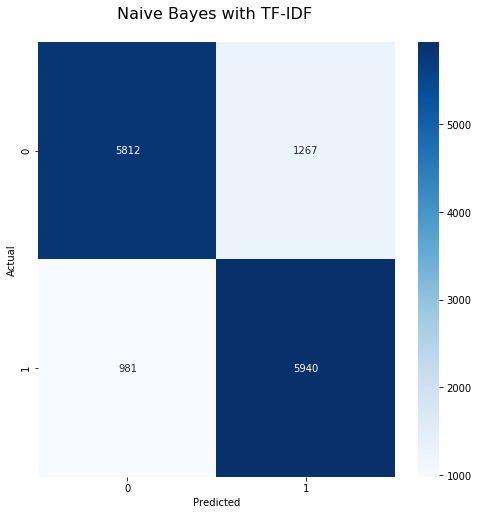

In [172]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_NB_tfidf, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes with TF-IDF \n", size=16)

In [173]:
print(classification_report(Y_test_tfidf,test_predict_NB_tfidf))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7079
           1       0.82      0.86      0.84      6921

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000



## Naive Bayes with Bag of Words

In [174]:
NB_bw=MultinomialNB(alpha=0.9)

In [175]:
NB_bw.fit(X_train_bw,Y_train_bw)

MultinomialNB(alpha=0.9, class_prior=None, fit_prior=True)

In [176]:
with open ('NB_bw.pickle','wb') as f:
    pickle.dump(NB_bw,f)

In [177]:
with open ('NB_bw.pickle','rb') as f:
    NB_bw=pickle.load(f)

In [178]:
train_accuracy = NB_bw.score(X_train_bw, Y_train_bw)
test_accuracy = NB_bw.score(X_test_bw, Y_test_bw)

print('Naive Bayes with Bag of Words', '-'*40, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Naive Bayes with Bag of Words
----------------------------------------
Accuracy on Train Data : 0.87
Accuracy on Test Data  : 0.87


In [179]:
test_predict_NB_bw=NB_bw.predict(X_test_bw)

In [180]:
cm_NB_bw=confusion_matrix(Y_test_bw,test_predict_NB_bw)
cm_NB_bw

array([[6123,  956],
       [ 927, 5994]], dtype=int64)

Text(0.5, 1, 'Naive Bayes with Bag of Words \n')

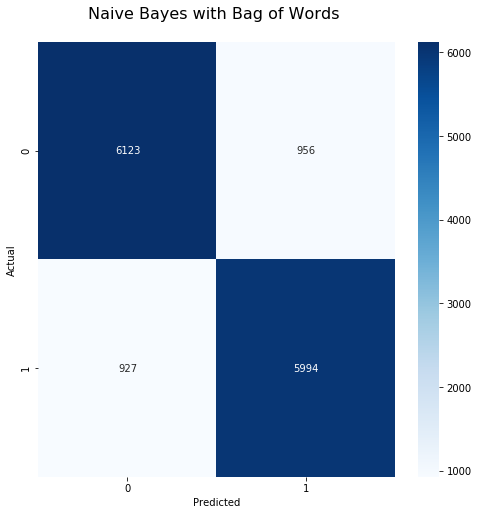

In [181]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_NB_bw, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes with Bag of Words \n", size=16)

In [182]:
print(classification_report(Y_test_bw,test_predict_NB_bw))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      7079
           1       0.86      0.87      0.86      6921

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



## Manual Testing with TI-IDF

In [186]:
def output_lable(n):
    if n == 0:
        return "Real News"
    elif n == 1:
        return "Fake News"

In [203]:
def manual_testing_tfidf(news):
    testing_news = {"text":[news]}
    new_test_news = pd.DataFrame(testing_news)
    
    new_test_news["text"] = new_test_news["text"].apply(before_lowercase_1)
    new_test_news["text"] = new_test_news["text"].apply(clean)
    new_test_news["text"] = new_test_news["text"].apply(word_tokenize)
    new_test_news["text"] = new_test_news["text"].apply(lemma_wordnet)
    new_test_news["text"] = new_test_news["text"].apply(combine_text)
    
    new_x_test = new_test_news["text"]
    new_xv_test = vectorizer_tfidf.transform(new_x_test)
    pred_LR = LG_tfidf.predict(new_xv_test)
    pred_DT = DT_tfidf.predict(new_xv_test)
    pred_RFC = RFC_tfidf.predict(new_xv_test)
    pred_NB = NB_tfidf.predict(new_xv_test)

    return print("\n\nLogistic Regression with TI-IDF Prediction: {} \nDecision Tree with TI-IDF Prediction      : {} \nRandom Forest with TF-IDF Prediction      : {} \nNaive Bayes with TF-IDF Prediction        : {}".format(output_lable(pred_LR[0]),
                                                                                                                                                                                                                                output_lable(pred_DT[0]), 
                                                                                                                                                                                                                                output_lable(pred_RFC[0]), 
                                                                                                                                                                                                                                output_lable(pred_NB[0])))

In [204]:
news = str(input())
manual_testing_tfidf(news)

Tina Fey once again took on Sarah Palin on Saturday Night Live, and as always, it was a gutbuster.Fey opened the January 23 edition of the comedy show with the  cold open,  appearing as Palin next to Darrell Hammond s always-on-point rendition of Donald Trump. The two were re-enacting Palin s bizarre endorsement of Trump from earlier in the week.https://www.youtube.com/watch?v=AfDKKe04sBQIntroducing her, Trump said,  I hope nobody s allergic to nuts, because we got a big one here. Palin then launched into a monologue eerily reminiscent of the real thing, freestyle rhyming about the Americans she supposedly is representing as part of the Trump trainwreck.Palin explained,  I belong in [Trump s] cabinet.  Cause I m full of spice, and I ve got a great rack. In a moment made for social media, Fey/Palin also spoke in tongues, shooting off her finger guns:Speaking for most of America, Trump noted,  She s crazy, isn t she? Fey of course also appeared in a version of Palin s blinding blouse fro

## Manual Testing with Bag of Words

In [205]:
def manual_testing_bw(news):
    testing_news = {"text":[news]}
    new_test_news = pd.DataFrame(testing_news)
    
    new_test_news["text"] = new_test_news["text"].apply(before_lowercase_1)
    new_test_news["text"] = new_test_news["text"].apply(clean)
    new_test_news["text"] = new_test_news["text"].apply(word_tokenize)
    new_test_news["text"] = new_test_news["text"].apply(lemma_wordnet)
    new_test_news["text"] = new_test_news["text"].apply(combine_text)
    
    new_x_test = new_test_news["text"]
    new_xv_test = vectorizer_bw.transform(new_x_test)
    pred_LR = LG_bw.predict(new_xv_test)
    pred_DT = DT_bw.predict(new_xv_test)
    pred_RFC = RFC_bw.predict(new_xv_test)
    pred_NB = NB_bw.predict(new_xv_test)

    return print("\n\nLogistic Regression with bag of words Prediction: {} \nDecision Tree with bag of words Prediction      : {} \nRandom Forest with bag of words Prediction      : {} \nNaive Bayes with bag of words Prediction        : {}".format(output_lable(pred_LR[0]),
                                                                                                                                                                                                                                output_lable(pred_DT[0]), 
                                                                                                                                                                                                                                output_lable(pred_RFC[0]), 
                                                                                                                                                                                                                                output_lable(pred_NB[0])))

In [207]:
news = str(input())
manual_testing_bw(news)

Besty Devos is Trump s conservative choice for Education Secretary. During her confirmation process leftist Bernie Sanders  most important question had absolutely nothing to do with providing our kids the best education possible. Sanders had one burning question for Betsy Devos, and it had to do with what else? How can we give Americans something for free?Betsy Devos  answer to Bernie was perfect 


Logistic Regression with bag of words Prediction: Fake News 
Decision Tree with bag of words Prediction      : Fake News 
Random Forest with bag of words Prediction      : Fake News 
Naive Bayes with bag of words Prediction        : Fake News
